# Predicting Heart Disease using Machine Learning

To build a model which can predict whether or not a certain individual has heart disease or not based on their medical history by using various machine learning and data science models 

## 1. Problem Definition

In a statement,
> Given the clinical history of patients whether we can predict if the patient has heart disease or not

## 2. Data 

The data came from UCI ML repository and is also available on Kaggle:
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation 

> If we can achieve 95% accuracy in predicting whether or not a person has heart disease we will pursue this project

## 4. Features

Here we can add the details about different features in the data

# Preparing the Tools

In [1]:
# importing all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the model evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

# Load The Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape #(rows, cols)

(303, 14)

In [3]:
# Exploring the Data (EDA or Exploratory Data Analysis)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Checking how many entries do we have of each label value
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

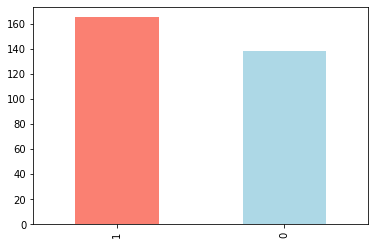

In [6]:
# Making it a little visual
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# so we can see that there is no missing data

In [10]:
# let us take a more insight into the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Frequency of Heart Disease according to the Sex


In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare sex col with target col using crosstab
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


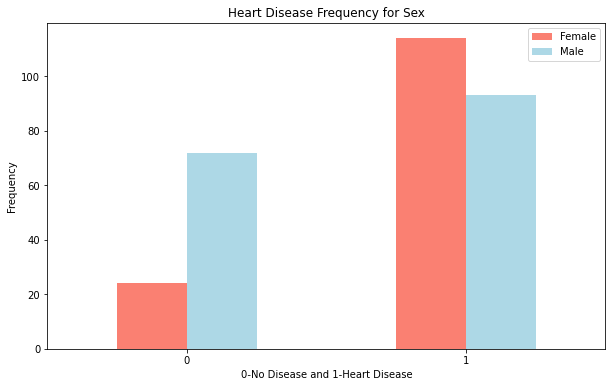

In [13]:
pd.crosstab(df.sex, df.target).plot(kind="bar", color=["salmon", "lightblue"], figsize=(10,6));
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0-No Disease and 1-Heart Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # making the x label horizontal

In [14]:
# Finding relations between age and thalach (maximum heart rate)
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [15]:
# Length is 91 i.e there are many different values so a bar graph wouldn't fit so we will use scatter plot

## Age vs Maximum Heart Rate

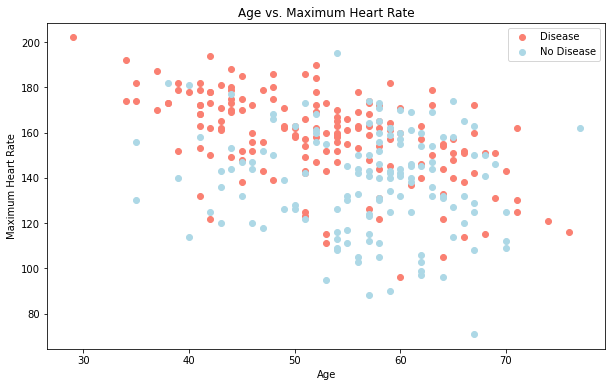

In [16]:
# creating a figure
plt.figure(figsize=(10,6));

# creating a scatter for positive values
plt.scatter(df.age[df.target==1],
        df.thalach[df.target==1],
        color="salmon");
# we can see that lower the age higher is the max heart rate for a person to have disease

# Plotting for negative values
plt.scatter(df.age[df.target==0],
        df.thalach[df.target==0],
        color="lightblue");

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Age vs. Maximum Heart Rate");

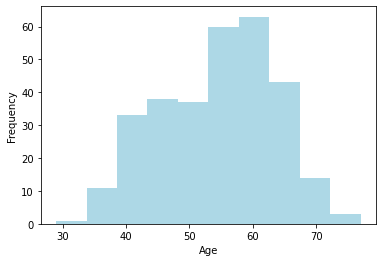

In [17]:
# Check the distribution of certain field in data
df.age.plot.hist(color="lightblue");
plt.xlabel("Age");

## Heart Disease Frequency vs. Chest Pain Type

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


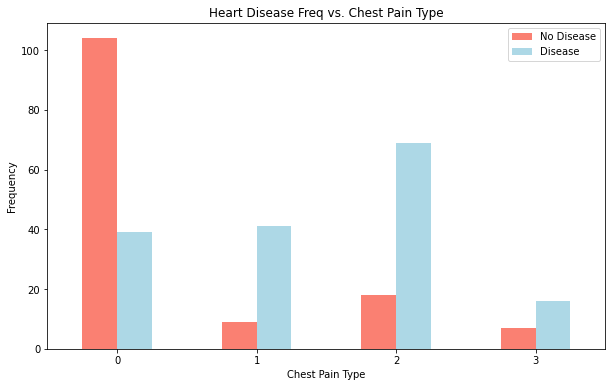

In [19]:
# making the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Freq vs. Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [20]:
# Building a Co-relation Matrix to find out how various independent variables are related
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


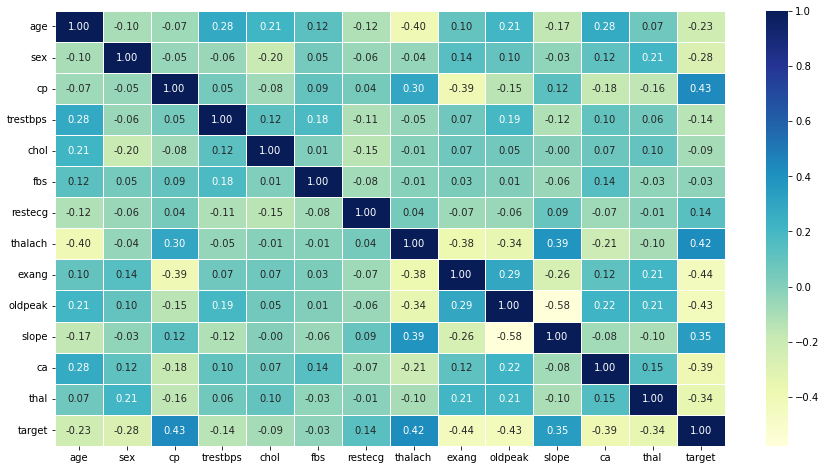

In [21]:
# making it visual using seaborn
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                linewidths=1,
                cmap="YlGnBu");

# negative corelation means one var increases then another decreases

# 5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Create X and y
X = df.drop("target", axis = 1)
y = df["target"]

In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
np.random.seed(42)
# Split our data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
len(X_train)

242

In [28]:
len(X_test)

61

* Now we have split the data into training and test sets 
* Now let us choose the right model for our classification problem

**We are going to use 3 different models:**
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest Classifier

In [29]:
# Creating a dictionary of 3 models
models = {"Logistic Regression": LogisticRegression(),
         "KNN Model" : KNeighborsClassifier(),
         "Random Forest Classifier" : RandomForestClassifier()}


# Looping through each model and fitting the data and adding scores to the dictionary
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits the data into different models in the model dictionary and returns a dictionary of evaluated scores
    models: Dictionary pf models
    X_train : X data for training (no_labels)
    X_test : X data for testing (no_labels)
    y_train : y data for training (labels)
    y-_test : y data for testing (labels)
    """
    # setup random seed
    np.random.seed(42)
    # create dictionary to maintain scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
model_scores = fit_and_evaluate(models, X_train, X_test, y_train, y_test)
model_scores

E:\ML_Projects\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN Model': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comaparison

In [31]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN Model,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


In [32]:
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN Model,0.688525
Random Forest Classifier,0.836066


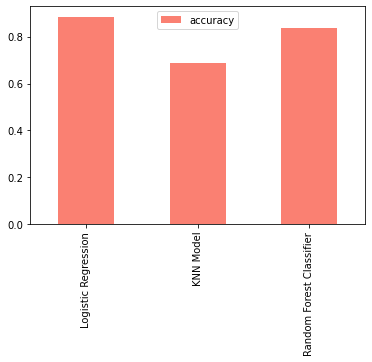

In [33]:
# Visual plotting of the comparisons
model_compare.T.plot.bar(color="salmon");

Now let us make the model better and look at the following:
* Hyper parameter tuning
* feature importance
* confusion matrix
* cross validation
* precision score
* recall score
* F1 score
* Classification Report
* Roc curve
* Area under the curve

## Hyperparameter Tuning by Hand

In [34]:
# Let us tune the KNN model
np.random.seed(42)

# create a list of train score
train_scores = []

# create a list of test score
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# Changing the value of n_neighbors
for i in neighbors:
    np.random.seed(42)
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [36]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum Score of the KNN Model: 75.41%


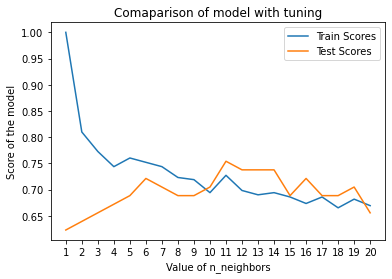

In [37]:
# Plotting a graph for diffferent values of n_neighbors and their score
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.title("Comaparison of model with tuning")
plt.xlabel("Value of n_neighbors")
plt.ylabel("Score of the model")
plt.legend()
plt.xticks(range(1,21,1))

print(f"Maximum Score of the KNN Model: {max(test_scores)*100:.2f}%")

## Tuning Hyperparameters using Randomized Search CV 

We are going to tune: 
* Logistic Regression Model 
* Random Forest Classifier

using Randomized Search CV

In [38]:
# Create a grid of different hyper parameters for LR Model

lr_model_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# For random forest model
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

In [39]:
# here we have the hyper paramter grids for both the models 
# now let us use this to evaluate models using Randomized search cv
np.random.seed(42)
# RSCV on Logistic Regression Model

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=lr_model_grid,
                               cv=5,
                               n_iter=20, # number of combinations
                               verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

**Now we have tuned the Logistic Regression Model**



Let us do the same for **Random Forest Classifier**


In [42]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          n_iter=20,
                          verbose=True)

# Fitting the model 
rs_rf.fit(X_train, y_train)

rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning for Logistic Regression Model

We can see that even after performing tuning the logisitic regression model performs better than the Random Forest Classifier.
* So we will further tune the Logistic Regression using Grid Search CV

In [44]:
lr_model_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [45]:
np.random.seed(42)

lr_model_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" : ["liblinear"]}

# grid search tries out all combinations
gs_lr_model = GridSearchCV(LogisticRegression(),
                          param_grid=lr_model_grid,
                          verbose=True,
                          cv=5)
gs_lr_model.fit(X_train, y_train)
gs_lr_model.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
gs_lr_model.score(X_test, y_test)

0.8852459016393442

In [47]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN Model': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

Here we can see that even after tuning the score is probably the best we can get here.

So we will proceed with **evaluation of the model** using different metrics

## Evaluating the Tuned Model Beyond Accuracy

We are going to check for:
* Roc Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision Score
* Recall Score
* F1-Score

Also remember to use cross-validation wherever possible.

**To evaluate: First we will make predictions using our best fitted model**

In [48]:
y_preds = gs_lr_model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## Plotting ROC Curve and getting AUC Score

E:\ML_Projects\heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


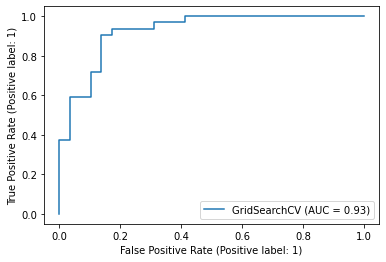

In [50]:
# Plotting the ROC Curve
plot_roc_curve(gs_lr_model,
              X_test,
              y_test);

## Confusion Matrix

In [51]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


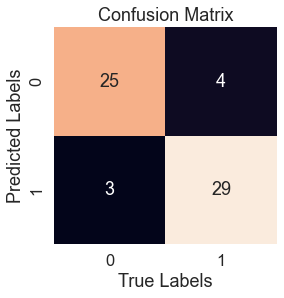

In [52]:
# Plot using Seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn given the true labels and predicted labels
    """
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    plt.title("Confusion Matrix")

plot_conf_mat(y_test, y_preds)

Now we have taken a look at the ROC Curve, AUC Score and the Confusion Matrix.

Let us now look at the classification report, precision score, recall score and f1 score using cross validation

In [53]:
print(classification_report(y_test, y_preds))
# This is not cross validated i.e using only one split

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Now let us use cross validation evaluation metrics

In [54]:
# Creating a new model with the best params

gs_lr_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train)
np.random.seed(42)

In [56]:
# Cross validated Accuracy
cv_accuracy = cross_val_score(clf,
                              X,
                              y,
                              scoring=None,
                              cv=5)
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [57]:
# Cross validated Precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              scoring="precision",
                              cv=5)
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [58]:
# Cross validated Recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [59]:
# Cross validated F1 SCore
cv_f1_score = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="f1")
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [60]:
# Plotting the Mean of the scores
eval_metrics = pd.DataFrame({
    "Accuracy" : cv_accuracy,
    "Precision" : cv_precision,
    "Recall" : cv_recall,
    "F1 Score" : cv_f1_score
    },
    index=[0],
)
eval_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


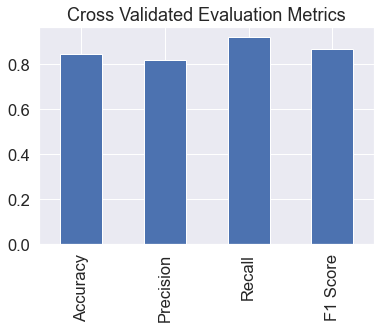

In [61]:
eval_metrics.T.plot.bar(title="Cross Validated Evaluation Metrics", legend=False);

### Feature Importance

Feature Importance is which features contribute most in outcomes of our model

In [62]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [63]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [64]:
# Zipping coeff values together with the columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

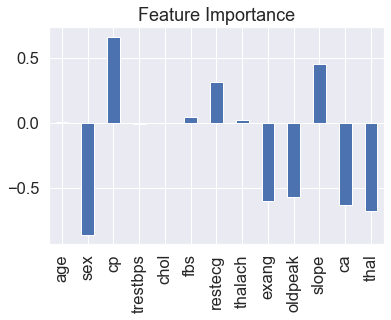

In [65]:
# Visualizing this

# Convert the dict to dataframe
feature_df = pd.DataFrame(feature_dict, index=[0])

# plot the df Transpose
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [66]:
# checking the corelation
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [67]:
# we do not have to look at the actual values rather the ratio of target to sex
72/24
# As the value increases the ratio decreases

3.0